In [1]:
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
import os 
from pathlib import Path
import re
import PIL
import cv2
import seaborn as sns 
import copy
import importlib

import spectral_util
importlib.reload(spectral_util)
from spectral_util import *

import fluorescence_util
importlib.reload(fluorescence_util)
from fluorescence_util import *


In [2]:
# 'board.xlsx'
# 'board_noFlux.xlsx'
# 'flux_20240925_184835.xlsx'
# 'flux-onBoard.xlsx'
# 'lead_noFlux.xlsx'

# srcbase = Path("./data/EEM_F-7000_2025-04-11/")
print(Path.cwd())
srcbase = Path("./data/EEM_F-7000_2025-05-29/")
dstdir = Path("./dst/eem/filter")

srcdata = [
    {
        "path": fpath,
        "sample": fpath.stem.split("_")[0],  # 'ABS_20250411' ‚Üí 'ABS'
        "label": None
    }
    for fpath in srcbase.glob("*.xlsx")
]
srcdata

c:\Users\sawamoto24\sawamoto24\‰øÆÂ£´Á†îÁ©∂\microplastic


[{'path': WindowsPath('data/EEM_F-7000_2025-05-29/ABS.xlsx'),
  'sample': 'ABS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/HDPE.xlsx'),
  'sample': 'HDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/LDPE.xlsx'),
  'sample': 'LDPE',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PC.xlsx'),
  'sample': 'PC',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PET_20250529_150210.xlsx'),
  'sample': 'PET',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PMMA.xlsx'),
  'sample': 'PMMA',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PP.xlsx'),
  'sample': 'PP',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PS.xlsx'),
  'sample': 'PS',
  'label': None},
 {'path': WindowsPath('data/EEM_F-7000_2025-05-29/PVC.xlsx'),
  'sample': 'PVC',
  'label': None}]

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].


<Figure size 640x480 with 0 Axes>

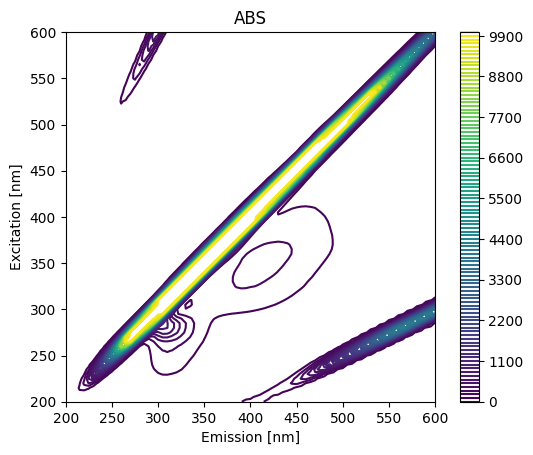

<Figure size 640x480 with 0 Axes>

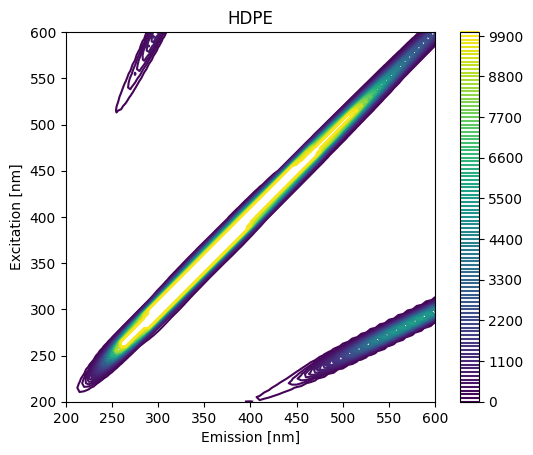

<Figure size 640x480 with 0 Axes>

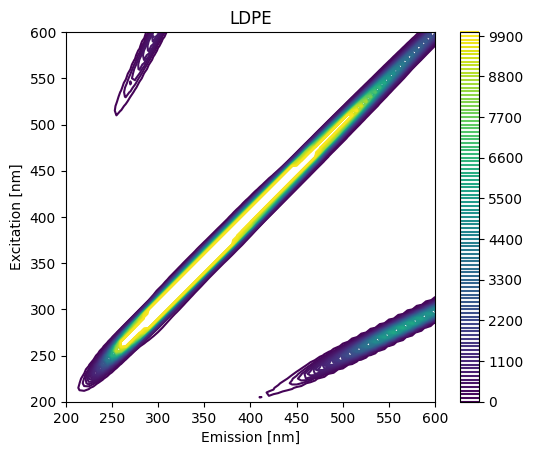

<Figure size 640x480 with 0 Axes>

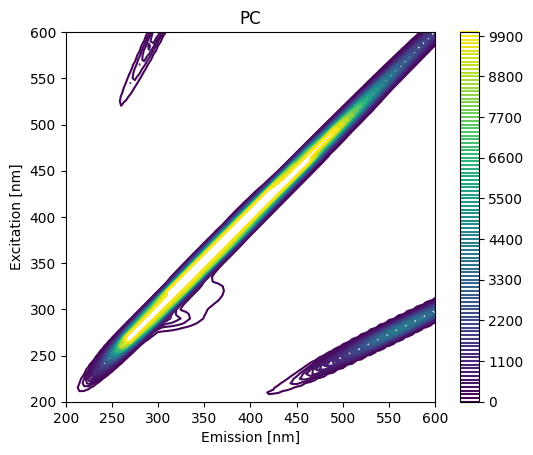

<Figure size 640x480 with 0 Axes>

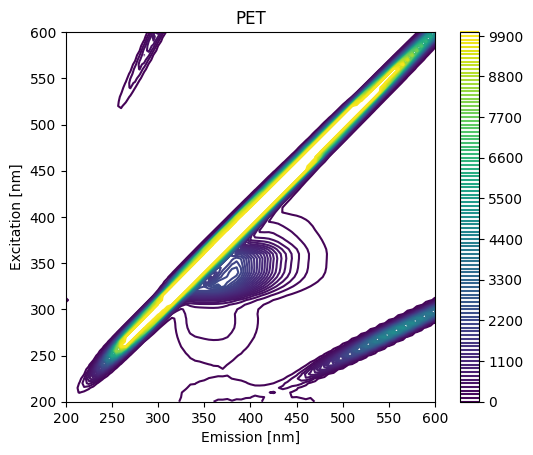

<Figure size 640x480 with 0 Axes>

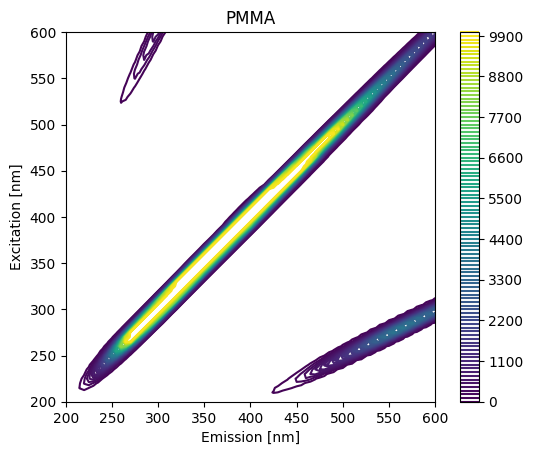

<Figure size 640x480 with 0 Axes>

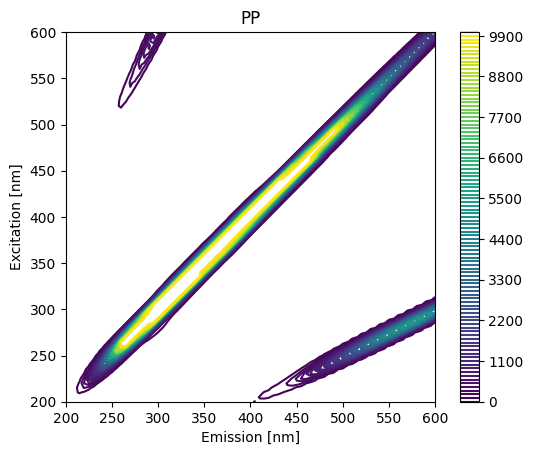

<Figure size 640x480 with 0 Axes>

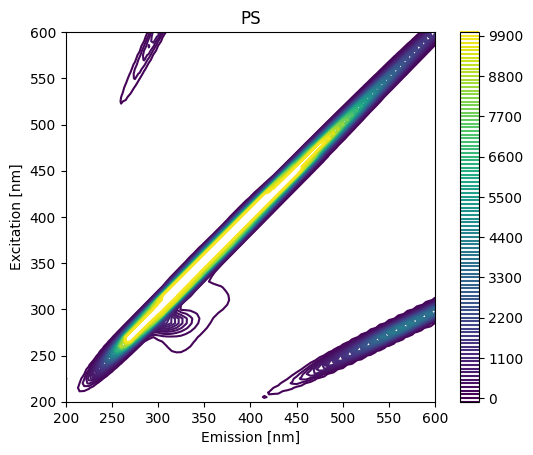

<Figure size 640x480 with 0 Axes>

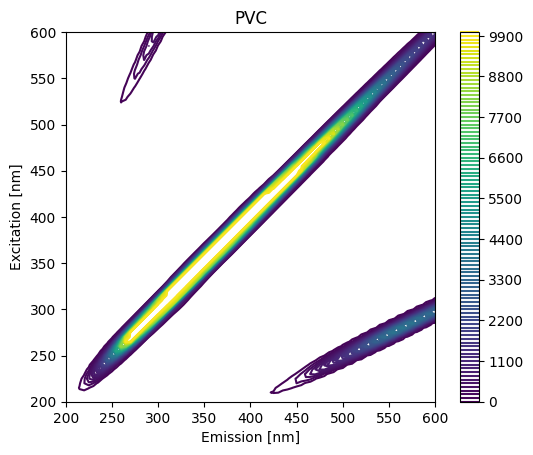

In [3]:
for data in srcdata:
    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()
    eem.plot_contour(level=100, show_sample_name=True)

In [4]:
em_bands = eem.em_bands
ex_bands = eem.ex_bands

EEM of "ABS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "HDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "LDPE"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PET"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PMMA"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PP"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PS"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
EEM of "PVC"-sample in Ex=[200.0--600.0nm of 5.0nm steps] and Em=[200.0--600.0nm of 5.0nm steps].
(9, 71, 71)


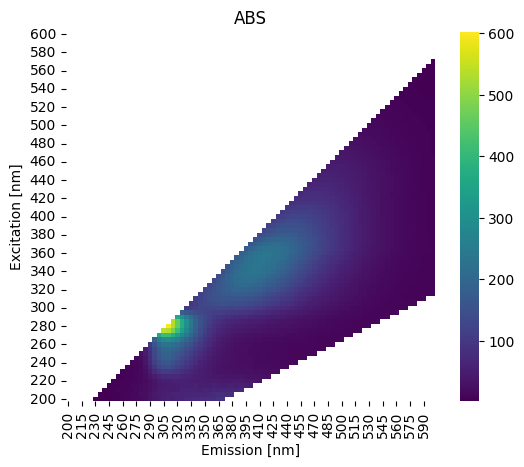

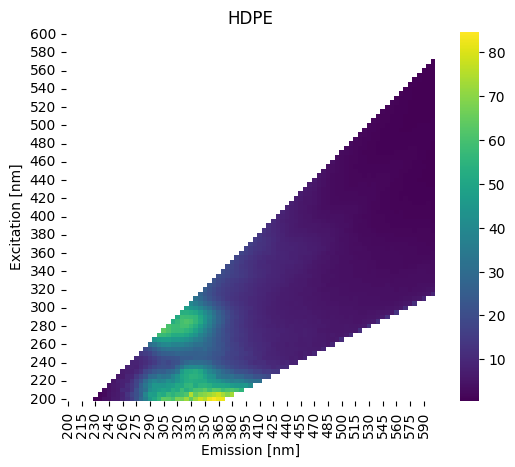

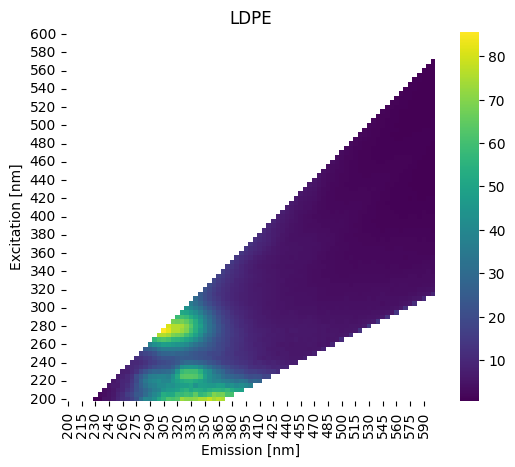

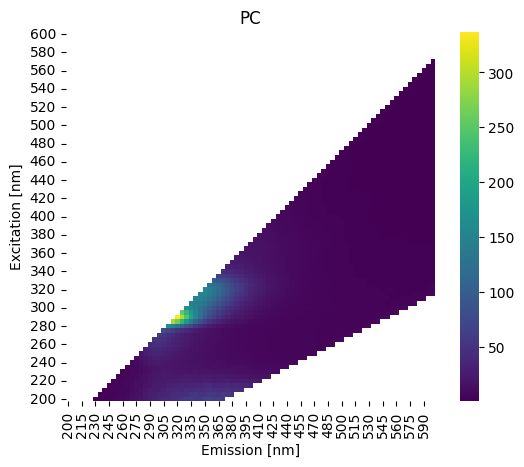

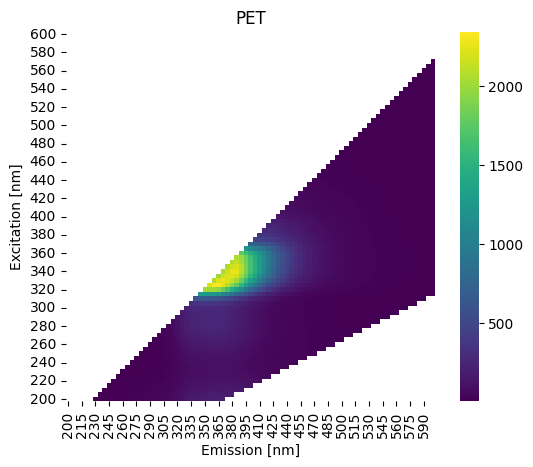

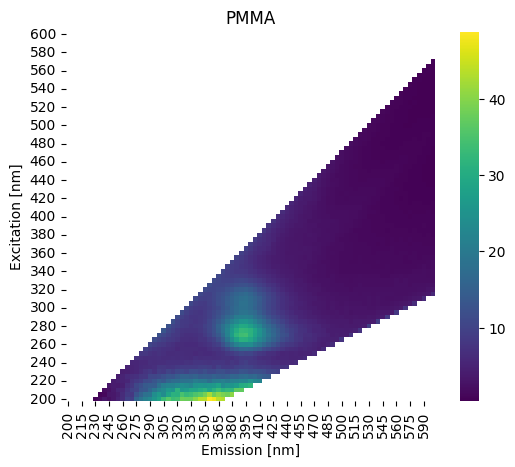

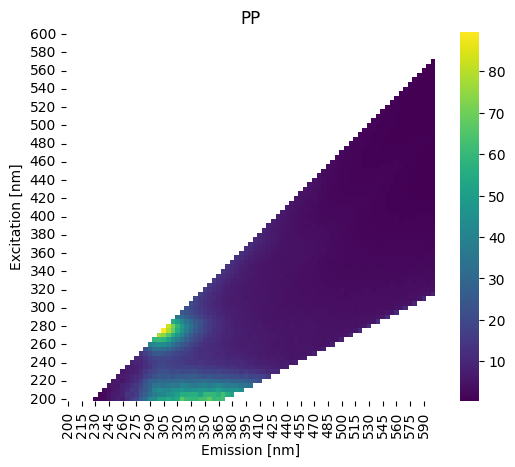

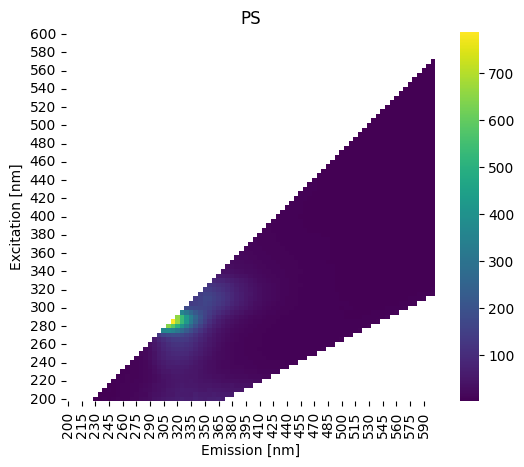

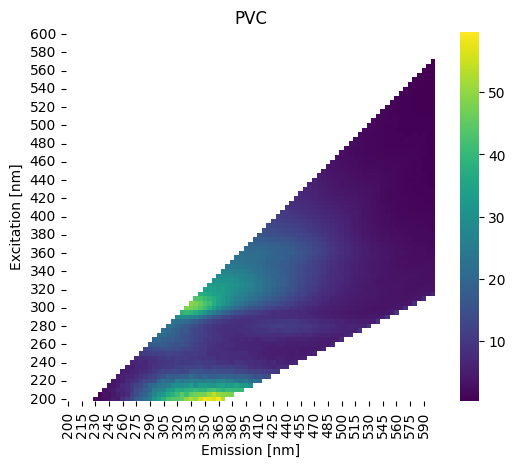

In [5]:
# for data in srcdata:
#     eem = fluorescence_util.EEMF7000(data.get('path'))
#     print(eem)

#     plt.figure()

#     # ‚ë† Êï£‰π±„Éî„Éº„ÇØÈô§Âéª
#     eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
#                                                        remove_first_order=True, 
#                                                        inplace=True)

#     # ‚ë° ËøΩÂä†„ÅßÊï£‰π±È†òÂüüÂÖ®‰Ωì„ÇíÈô§Âéª
#     eem.remove_scatter_regions(inplace=True)

#     eem.plot_heatmap()
#     plt.title(eem.sample)

sample_data = []
sample_name = []

for data in srcdata:

    eem = fluorescence_util.EEMF7000(data.get('path'))
    print(eem)

    plt.figure()

    # ‚ë†Êï£‰π±„Éî„Éº„ÇØÈô§Âéª
    eem.remove_self_reflection_and_scattering_from_eem(margin_steps=6,
                                                       remove_first_order=True,
                                                        inplace=True)

    # ‚ë° ËøΩÂä†„ÅßÊï£‰π±È†òÂüüÂÖ®‰Ωì„ÇíÈô§Âéª
    eem.remove_scatter_regions(inplace=True)

    
    # 250nm‰ª•‰∏ä„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÂèñÂæó
    ex_mask = ex_bands >= 250
    em_mask = em_bands >= 250

    eem.plot_heatmap()
    plt.title(eem.sample)


    eem_matrix = eem.mat  # numpyÈÖçÂàó„ÇíÂèñ„ÇäÂá∫„Åô

    eem_matrix = np.nan_to_num(eem.mat, nan=0.0)
    eem_matrix_trimmed = eem_matrix[np.ix_(ex_mask, em_mask)]

    sample_data.append(eem_matrix_trimmed)
    sample_name.append(eem.sample)


# numpyÈÖçÂàó„Å´‰øùÂ≠ò
eem_array = np.array(sample_data)
print(eem_array.shape)

## Ê≥¢Èï∑Âüü„ÅÆË™øÊï¥

In [6]:
ex_mask = np.array(ex_bands) >= 250
em_mask = np.array(em_bands) >= 250

# trim
ex_bands = np.array(ex_bands)[ex_mask]
em_bands = np.array(em_bands)[em_mask]

print("Excitation bands ‚â• 250nm:", ex_bands)
print("Emission bands ‚â• 250nm:", em_bands)


Excitation bands ‚â• 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]
Emission bands ‚â• 250nm: [250. 255. 260. 265. 270. 275. 280. 285. 290. 295. 300. 305. 310. 315.
 320. 325. 330. 335. 340. 345. 350. 355. 360. 365. 370. 375. 380. 385.
 390. 395. 400. 405. 410. 415. 420. 425. 430. 435. 440. 445. 450. 455.
 460. 465. 470. 475. 480. 485. 490. 495. 500. 505. 510. 515. 520. 525.
 530. 535. 540. 545. 550. 555. 560. 565. 570. 575. 580. 585. 590. 595.
 600.]


## „Éé„Ç§„Ç∫„ÅÇ„Çä„Çµ„É≥„Éó„É´„ÅÆÁîüÊàê

### ÂêÑMP„Åî„Å®„Å´ÁîüÊàê

In [7]:
def augment_eem_per_mp_with_scatter_removal(eem_array, ex_bands, em_bands, n_variants=20, noise_level=0.05, seed=None):
    """
    „Éé„Ç§„Ç∫‰ªò„ÅçEEM„ÇíÁîüÊàê„Åó„ÄÅÊï£‰π±È†òÂüü„Çí0„Å´„Åó„Å¶Èô§Âéª„Åô„Çã„ÄÇ

    Parameters:
        eem_array: np.ndarray
            ÂÖ•ÂäõEEMÈÖçÂàó„ÄÇshape = (num_MP, n_ex, n_em)
        ex_bands: np.ndarray
            Âä±Ëµ∑Ê≥¢Èï∑„É™„Çπ„ÉàÔºàshape = n_exÔºâ
        em_bands: np.ndarray
            ËõçÂÖâÊ≥¢Èï∑„É™„Çπ„ÉàÔºàshape = n_emÔºâ
        n_variants: int
            ÂêÑMP„Åî„Å®„Å´ÁîüÊàê„Åô„Çã„Éé„Ç§„Ç∫‰ªò„ÅçEEM„ÅÆÊï∞
        noise_level: float
            „Éé„Ç§„Ç∫„ÅÆ„Çπ„Ç±„Éº„É´ÔºàÊúÄÂ§ßÂÄ§„Å´ÂØæ„Åô„ÇãÂâ≤ÂêàÔºâ
        seed: int or None
            ‰π±Êï∞„Ç∑„Éº„Éâ

    Returns:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
    """
    if seed is not None:
        np.random.seed(seed)

    num_MP, n_ex, n_em = eem_array.shape
    augmented_eems = np.zeros((num_MP, n_variants, n_ex, n_em))

    # Êï£‰π±È†òÂüü„Éû„Çπ„ÇØÔºàTrue: ÊúâÂäπÈ†òÂüü, False: Êï£‰π± ‚Üí 0„Å´„Åô„ÇãÔºâ
    ex_grid, em_grid = np.meshgrid(ex_bands, em_bands, indexing='ij')
    valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)

    for i in range(num_MP):
        base_eem = eem_array[i]
        for j in range(n_variants):
            noise = np.random.normal(loc=0, scale=noise_level * np.max(base_eem), size=base_eem.shape)
            noisy_eem = np.clip(base_eem + noise, 0, None)
            noisy_eem[~valid_mask] = 0  # Êï£‰π±È†òÂüü„Çí0„Å´
            augmented_eems[i, j] = noisy_eem

    return augmented_eems
# ex_bands, em_bands „ÅØ np.array „ÅßÂÆöÁæ©„Åï„Çå„Å¶„ÅÑ„Çã„Å®‰ªÆÂÆö
augmented_eems = augment_eem_per_mp_with_scatter_removal(
    eem_array,
    ex_bands=ex_bands,
    em_bands=em_bands,
    n_variants=50,
    noise_level=0,
    seed=42
)


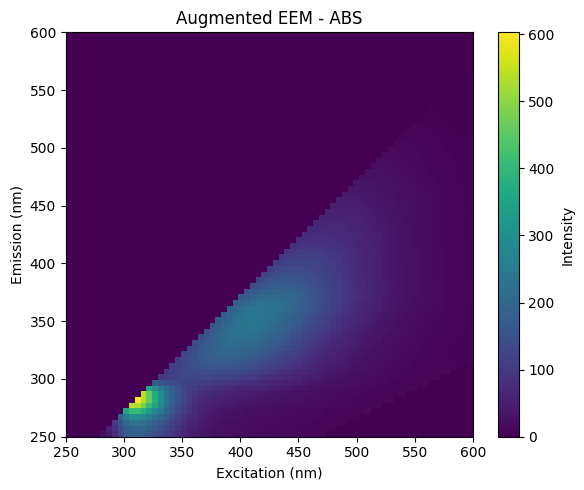

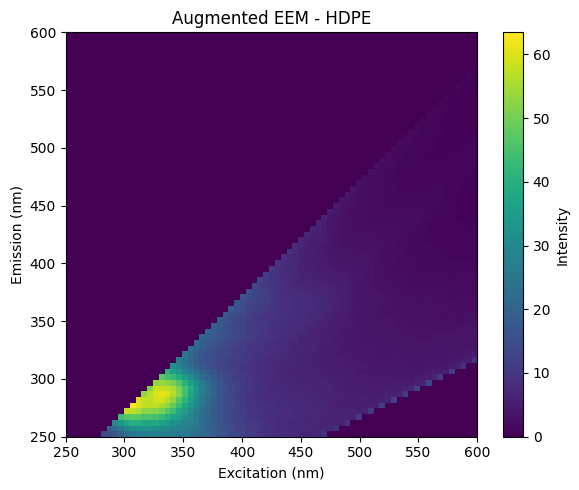

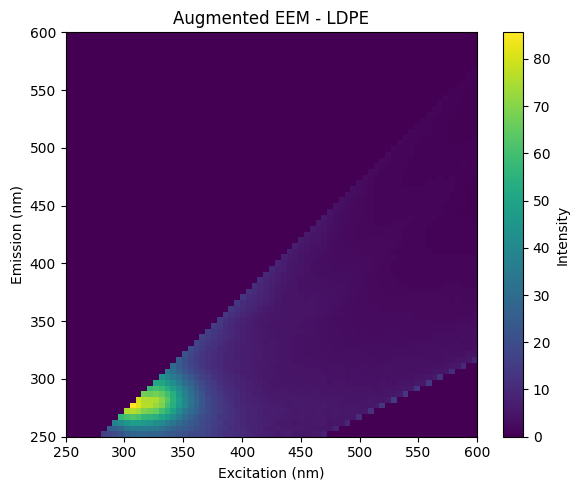

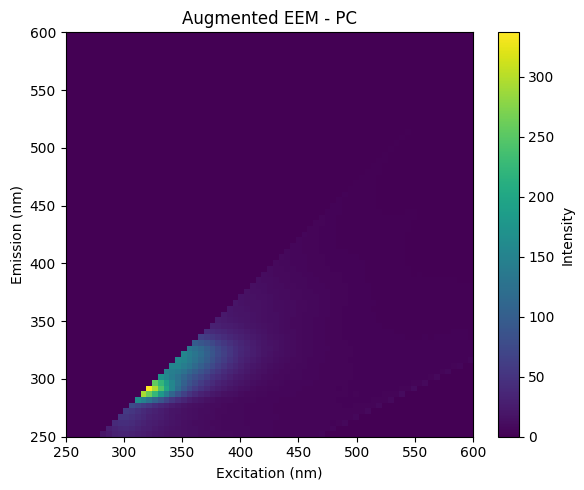

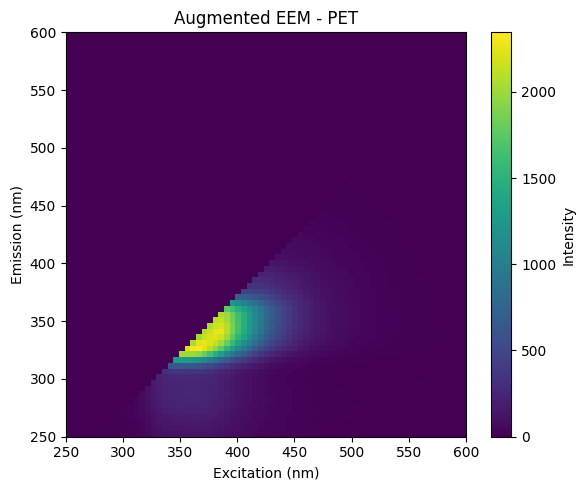

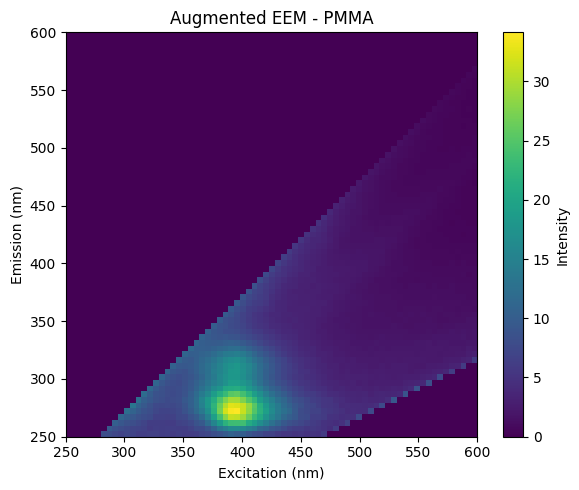

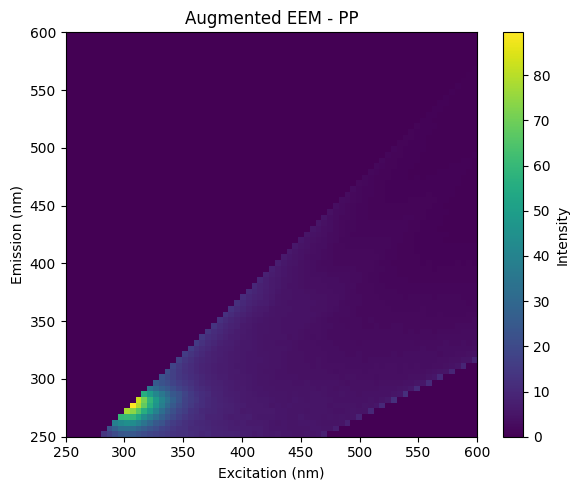

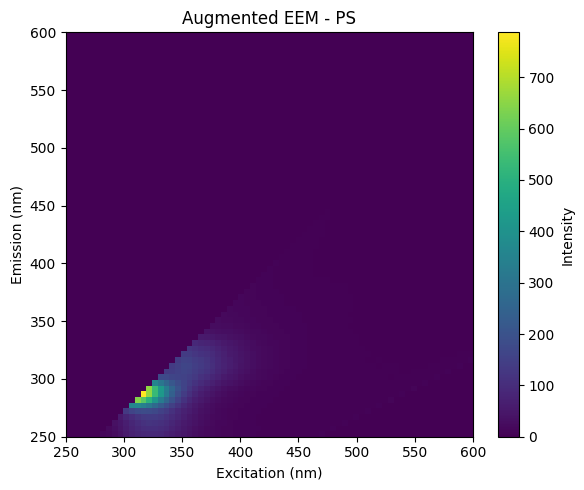

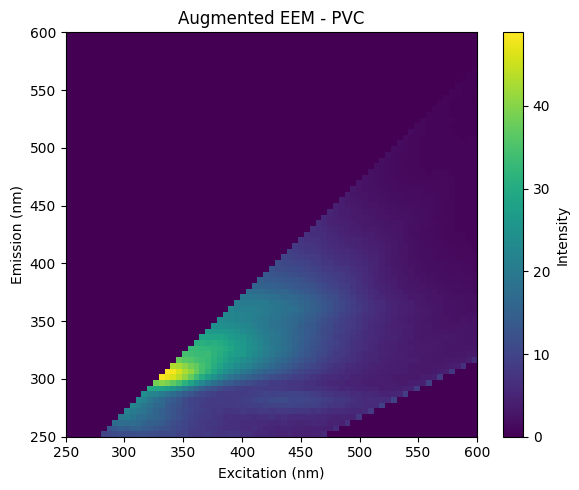

In [8]:
import matplotlib.pyplot as plt

def plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=None):
    """
    ÂêÑMP„Åã„Çâ1„Å§„Åö„Å§„Éé„Ç§„Ç∫‰ªò„ÅçEEM„Çí„ÄÅÂÄãÂà•„Å´„Éó„É≠„ÉÉ„ÉàÔºàÂä±Ëµ∑ÔºöÊ®™Ëª∏„ÄÅÊîæÂ∞ÑÔºöÁ∏¶Ëª∏Ôºâ„ÄÇ

    Parameters:
        augmented_eems: np.ndarray
            shape = (num_MP, n_variants, n_ex, n_em)
        ex_bands: np.ndarray
            Âä±Ëµ∑Ê≥¢Èï∑„É™„Çπ„ÉàÔºàÊ®™Ëª∏Ôºâ
        em_bands: np.ndarray
            Áô∫ÂÖâÊ≥¢Èï∑„É™„Çπ„ÉàÔºàÁ∏¶Ëª∏Ôºâ
        sample_names: list or None
            MP„Åî„Å®„ÅÆÂêçÂâç„É™„Çπ„ÉàÔºà‰ªªÊÑèÔºâ
    """
    num_MP = augmented_eems.shape[0]

    for mp_idx in range(num_MP):
        eem = augmented_eems[mp_idx, 0]  # ÂêÑMP„ÅßÊúÄÂàù„ÅÆ„Éé„Ç§„Ç∫„Éê„Éº„Ç∏„Éß„É≥„ÇíË°®Á§∫

        plt.figure(figsize=(6, 5))
        plt.imshow(eem, origin='lower',
                   extent=[ex_bands[0], ex_bands[-1], em_bands[0], em_bands[-1]],
                   aspect='auto', cmap='viridis')

        plt.xlabel('Excitation (nm)')
        plt.ylabel('Emission (nm)')
        title = sample_names[mp_idx] if sample_names else f'MP {mp_idx}'
        plt.title(f'Augmented EEM - {title}')
        plt.colorbar(label='Intensity')
        plt.tight_layout()
        plt.show()

plot_augmented_eems_one_by_one(augmented_eems, ex_bands, em_bands, sample_names=sample_name)
# plot_augmented_eems_one_by_one(combined_augmented_eems, ex_bands, em_bands, sample_names=sample_name)


## MP„ÅÆEEM„ÇíÂêàÊàê

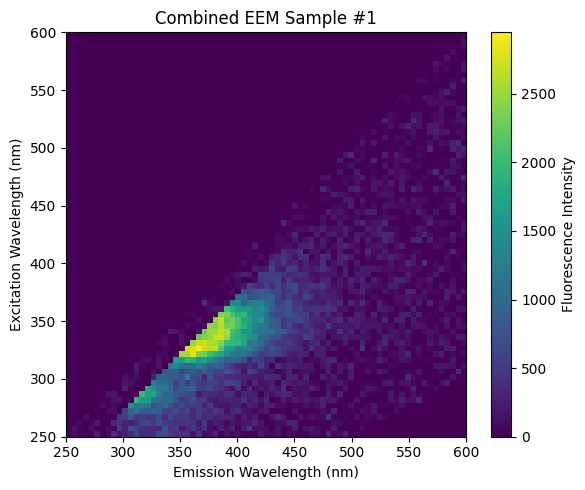

In [9]:
def generate_combined_eem_with_noise(
    eem_array, ex_bands, em_bands,
    n_variants=20, noise_level=0.05, seed=None
):
    """
    ÂÖ®MP„ÅÆEEM„ÇíÂêàÊàê„Åó„Å¶„ÄÅ„Éé„Ç§„Ç∫‰ªò„Åç„ÅÆEEM„ÇíÁîüÊàêÔºàÊï£‰π±È†òÂüüÈô§Âéª„Å§„ÅçÔºâ

    Parameters:
        eem_array: np.ndarray
            shape = (num_MP, n_ex, n_em)
        ex_bands: np.ndarray
            Âä±Ëµ∑Ê≥¢Èï∑„É™„Çπ„ÉàÔºàshape = n_exÔºâ
        em_bands: np.ndarray
            ÊîæÂ∞ÑÊ≥¢Èï∑„É™„Çπ„ÉàÔºàshape = n_emÔºâ
        n_variants: int
            ÁîüÊàê„Åô„Çã„Éê„É™„Ç®„Éº„Ç∑„Éß„É≥Êï∞
        noise_level: float
            „Éé„Ç§„Ç∫„ÅÆ„Çπ„Ç±„Éº„É´ÔºàÂêàÊàêEEM„ÅÆÊúÄÂ§ßÂÄ§„Å´ÂØæ„Åô„ÇãÂâ≤ÂêàÔºâ
        seed: int or None
            ‰π±Êï∞„Ç∑„Éº„Éâ

    Returns:
        combined_eems: np.ndarray
            shape = (n_variants, n_ex, n_em)
    """
    if seed is not None:
        np.random.seed(seed)

    # --- ÂêàÊàêEEMÔºà„Åô„Åπ„Å¶„ÅÆMP„ÅÆÂíåÔºâ
    combined_base = np.sum(eem_array, axis=0)  # shape = (n_ex, n_em)

    # --- Êï£‰π±È†òÂüü„Éû„Çπ„ÇØ„Çí‰ΩúÊàê
    ex_grid, em_grid = np.meshgrid(ex_bands, em_bands, indexing='ij')
    valid_mask = (em_grid >= ex_grid) & (em_grid <= 2 * ex_grid)

    # --- „Éé„Ç§„Ç∫‰ªò„ÅçEEM„ÅÆÁîüÊàê
    combined_eems = np.zeros((n_variants, *combined_base.shape))
    for i in range(n_variants):
        noise = np.random.normal(loc=0, scale=noise_level * np.max(combined_base), size=combined_base.shape)
        noisy_eem = np.clip(combined_base + noise, 0, None)
        noisy_eem[~valid_mask] = 0  # Êï£‰π±È†òÂüü„Çí„Çº„É≠„Å´
        combined_eems[i] = noisy_eem

    return combined_eems

combined_augmented_eems = generate_combined_eem_with_noise(
    eem_array,
    ex_bands=ex_bands,
    em_bands=em_bands,
    n_variants=50,
    noise_level=0.05,
    seed=123
)


# 1ÊûöÁõÆ„ÇíÂèñÂæó
eem_sample = combined_augmented_eems[0]

# „Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(6, 5))
plt.imshow(
    eem_sample,
    aspect='auto',
    origin='lower',
    extent=[em_bands.min(), em_bands.max(), ex_bands.min(), ex_bands.max()],
    cmap='viridis'
)
plt.colorbar(label='Fluorescence Intensity')
plt.xlabel('Emission Wavelength (nm)')
plt.ylabel('Excitation Wavelength (nm)')
plt.title('Combined EEM Sample #1')
plt.tight_layout()
plt.show()


## PARAFACÔºåCore ConsistencyÔºåSplit half

In [10]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
from scipy.stats import pearsonr
from corcondia import corcondia_3d

tl.set_backend('numpy')

# --- PARAFACÁµêÊûú„Çí„Åô„Åπ„Å¶‰øùÂ≠ò„Åô„ÇãÈñ¢Êï∞ ---
def compute_parafac_results(eem_tensor, max_components):
    results = []
    for r in range(1, max_components + 1):
        factors = parafac(eem_tensor, rank=r, init='random', tol=1e-6, n_iter_max=200)
        results.append(factors)
    return results

# --- Core Consistency Diagnostic (Ê≠£ÂºèÁâà CORCONDIA)
def compute_core_consistency_corcondia(tensor, max_components=7):
    cc_list = []
    for r in range(1, max_components + 1):
        cc = corcondia_3d(tensor, k=r)
        cc_list.append(cc)
    return cc_list

# --- Split-Half È°û‰ººÂ∫¶„ÅÆ‰∏ÄÊã¨Ë®àÁÆóÔºàÂêÑ„É©„É≥„ÇØ„ÅßÂà•„ÄÖ„Å´ÂàÜÂâ≤ÔºãÂàÜËß£Ôºâ
def compute_split_half_similarities(tensor, max_components):
    sim_list = []
    for r in range(1, max_components + 1):
        all_idx = np.arange(tensor.shape[2])
        np.random.shuffle(all_idx)
        half1 = tensor[:, :, all_idx[:tensor.shape[2] // 2]]
        half2 = tensor[:, :, all_idx[tensor.shape[2] // 2:]]

        f1 = parafac(half1, rank=r, init='random', tol=1e-6, n_iter_max=200)
        f2 = parafac(half2, rank=r, init='random', tol=1e-6, n_iter_max=200)

        ex1, em1, _ = f1.factors
        ex2, em2, _ = f2.factors

        sim_total = 0
        for i in range(r):
            r_ex, _ = pearsonr(ex1[:, i], ex2[:, i])
            r_em, _ = pearsonr(em1[:, i], em2[:, i])
            sim_total += (r_ex + r_em) / 2
        sim_list.append(sim_total / r)
    return sim_list

# --- ÂêÑMP„Å´ÂØæ„Åó„Å¶ Core ConsistencyÔºàCORCONDIAÔºâ„Å® Split-Half È°û‰ººÂ∫¶„ÇíË®àÁÆó ---
cc_dict = {}
sh_dict = {}
factors_dict = {}

for idx, eem_tensor in enumerate(augmented_eems):
    sample = sample_name[idx]
    print(f"\nüîç„Äê{sample}„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...")

    tensor = np.transpose(eem_tensor, (1, 2, 0))  # (exc, em, sample)
    factors_dict[sample] = compute_parafac_results(tensor, max_components=7)

    # Ê≠£Âºè„Å™ Core Consistency Ë®àÁÆóÔºàCORCONDIAÔºâ
    cc_dict[sample] = compute_core_consistency_corcondia(tensor, max_components=7)

    # Split-Half È°û‰ººÂ∫¶
    sh_dict[sample] = compute_split_half_similarities(tensor, max_components=7)



üîç„ÄêABS„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêHDPE„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêLDPE„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêPC„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêPET„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêPMMA„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêPP„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêPS„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...

üîç„ÄêPVC„Äë„ÅÆ Core Consistency / Split-Half Ë®àÁÆó‰∏≠...


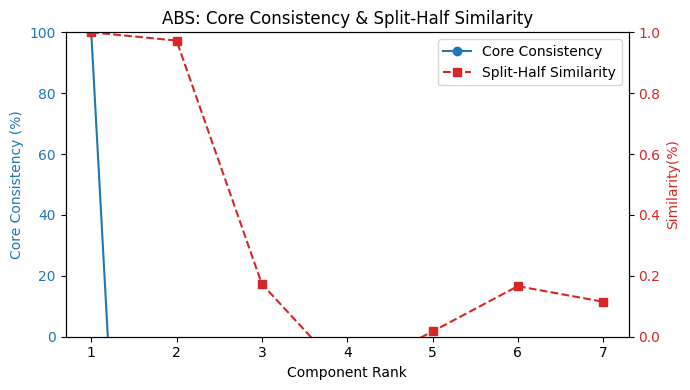

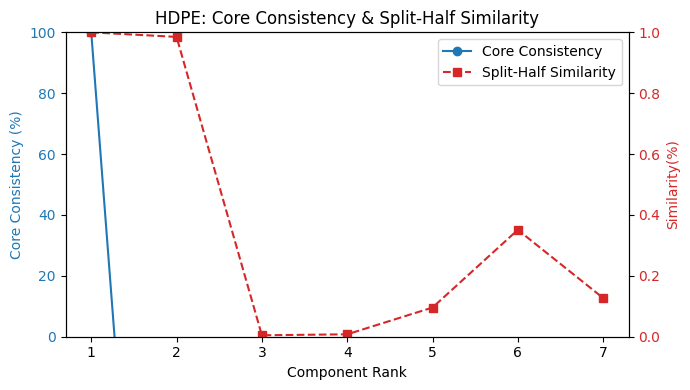

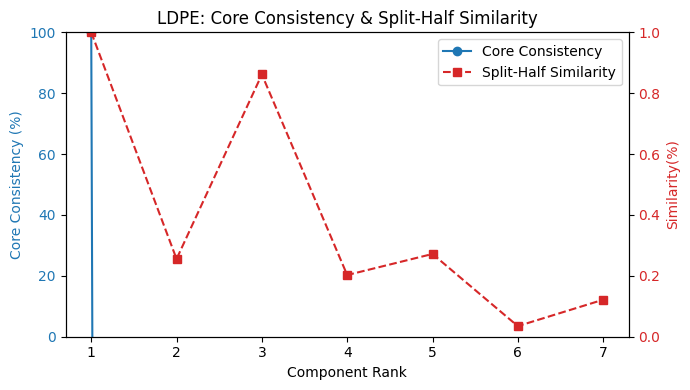

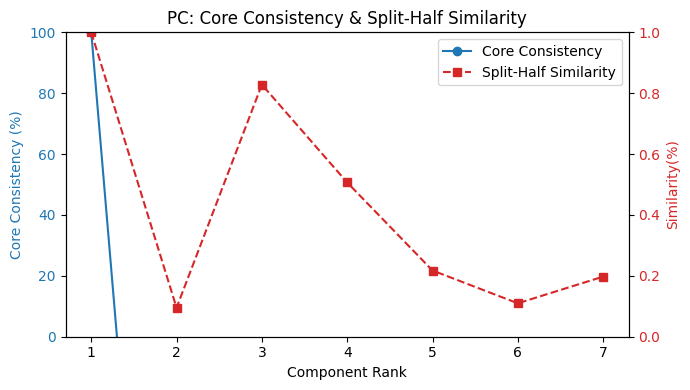

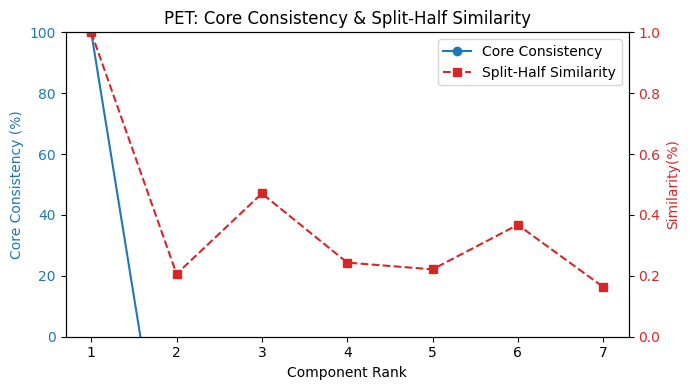

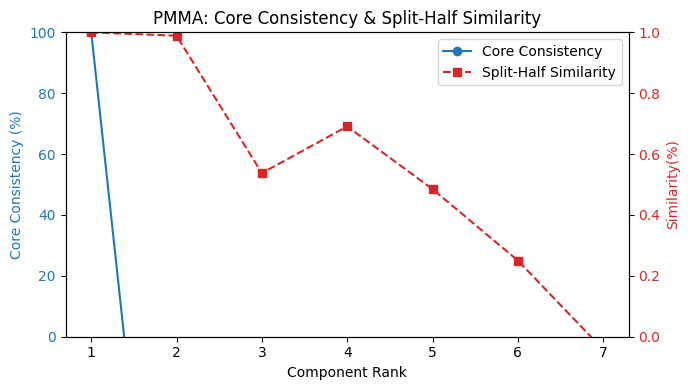

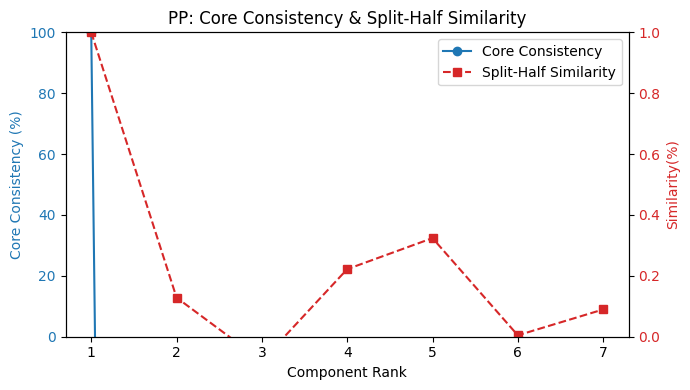

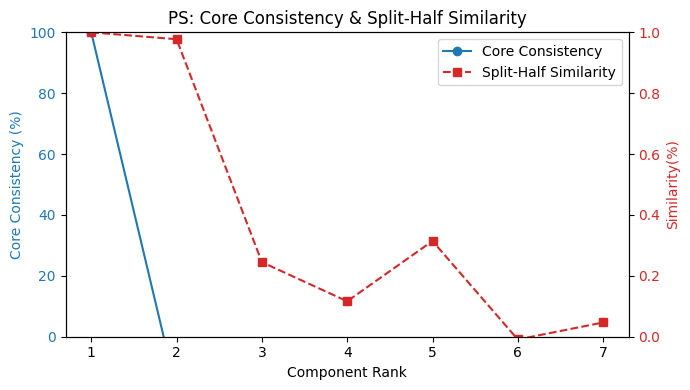

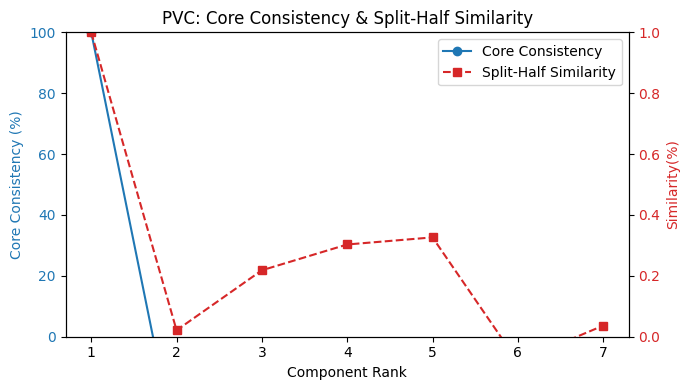

In [11]:
import matplotlib.pyplot as plt

def plot_core_consistency_and_similarity(cc_list, sh_list, sample_label="Sample", start_rank=1):
    """
    Core Consistency„Å®Split-HalfÈ°û‰ººÂ∫¶„ÇíÂêåÊôÇ„Å´„Éó„É≠„ÉÉ„Éà„Åô„ÇãÈñ¢Êï∞

    Parameters:
        cc_list: list of floatÔºàCore Consistency, ÂêÑÊàêÂàÜÊï∞„Å´ÂØæÂøúÔºâ
        sh_list: list of floatÔºàSplit-Half È°û‰ººÂ∫¶, ÂêÑÊàêÂàÜÊï∞„Å´ÂØæÂøúÔºâ
        sample_label: strÔºà„Éó„É≠„ÉÉ„Éà„Çø„Ç§„Éà„É´Áî®Ôºâ
        start_rank: intÔºàÈÄöÂ∏∏„ÅØ1, cc_list[0]„Åårank=1„ÅÆ„Å®„ÅçÔºâ
    """
    ranks = list(range(start_rank, start_rank + len(cc_list)))

    fig, ax1 = plt.subplots(figsize=(7, 4))
    ax2 = ax1.twinx()

    ax1.plot(ranks, cc_list, 'o-', color='tab:blue', label='Core Consistency')
    ax2.plot(ranks, sh_list, 's--', color='tab:red', label='Split-Half Similarity')

    ax1.set_xlabel("Component Rank")
    ax1.set_ylabel("Core Consistency (%)", color='tab:blue')
    ax1.set_ylim(0, 100)
    ax2.set_ylabel("Similarity(%)", color='tab:red')
    ax2.set_ylim(0, 1.0)

    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    ax1.set_title(f"{sample_label}: Core Consistency & Split-Half Similarity")

    # Âá°‰æã„ÅÆË®≠ÂÆö
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    plt.tight_layout()
    plt.show()

# for sample in sample_name:
#     plot_core_consistency_and_similarity(cc_list, sh_list, sample_label=sample)
for sample in sample_name:
    cc_list = cc_dict.get(sample)
    sh_list = sh_dict.get(sample)
    if cc_list is not None and sh_list is not None:
        plot_core_consistency_and_similarity(cc_list, sh_list, sample_label=sample)
    else:
        print(f"{sample} „ÅÆËß£ÊûêÁµêÊûú„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ")


## „Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÅÆÂèØË¶ñÂåñ

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_eem_with_bandpass_box(eem, ex_bands, em_bands,
                                excitation_loading, emission_loading,
                                rank, band_width=20, sample_label="MP"):
    """
    „Éé„Ç§„Ç∫‰ªò„ÅçEEM‰∏ä„Å´„ÄÅÊåáÂÆö„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„ÅÆ„Éê„É≥„Éâ„Éë„ÇπÊ≥¢Èï∑ÁØÑÂõ≤„ÇíÁ¥´„ÅÆÂõõËßí„ÅßÈáç„Å≠„Å¶Ë°®Á§∫

    Parameters:
        eem: 2D array (ex √ó em)
        ex_bands: 1D array
        em_bands: 1D array
        excitation_loading: 2D array (ex, rank)
        emission_loading: 2D array (em, rank)
        component_idx: intÔºà‰ΩïÁï™ÁõÆ„ÅÆ„Ç≥„É≥„Éù„Éº„Éç„É≥„Éà„Åã„ÄÅ0Âßã„Åæ„ÇäÔºâ
        band_width: floatÔºà¬±‰Ωïnm„ÅßÁØÑÂõ≤„ÇíÂèñ„Çã„ÅãÔºâ
        sample_label: str
    """

    # EEM„Çí„Éó„É≠„ÉÉ„Éà
    fig, ax = plt.subplots(figsize=(6, 5))
    im = ax.imshow(eem, origin='lower',
                   extent=[em_bands[0], em_bands[-1],
                           ex_bands[0], ex_bands[-1]],
                   aspect='auto', cmap='viridis')
    
    for i in range(rank):
        # „Éî„Éº„ÇØÊ≥¢Èï∑„Çí„É≠„Éº„Éá„Ç£„É≥„Ç∞„Åã„ÇâÊäΩÂá∫
        exc_idx = np.argmax(excitation_loading[:, i])
        em_idx = np.argmax(emission_loading[:, i])
        exc_peak = ex_bands[exc_idx]
        em_peak = em_bands[em_idx]

        # ÂõõËßí„ÅÆÁØÑÂõ≤Ôºà¬±band_widthÔºâ
        exc_min = exc_peak - band_width
        exc_max = exc_peak + band_width
        em_min = em_peak - band_width
        em_max = em_peak + band_width

        # # „É≠„Éº„Éá„Ç£„É≥„Ç∞
        # exc = excitation_loading[:, i]
        # em = emission_loading[:, i]

        # # „Éî„Éº„ÇØ‰ΩçÁΩÆÔºàÊúÄÂ§ßÂÄ§Ôºâ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ ‚Üí Ê≥¢Èï∑
        # exc_idx = np.argmax(exc)
        # em_idx = np.argmax(em)
        # exc_peak = ex_bands[exc_idx]
        # em_peak = em_bands[em_idx]

        # # üéØ Âä±Ëµ∑„É≠„Éº„Éá„Ç£„É≥„Ç∞„ÅÆÊ®ôÊ∫ñÂÅèÂ∑Æ„Çí‰Ωø„Å£„Å¶ band_width „ÇíÊ±∫„ÇÅ„Çã
        # # Èáç„Åø‰ªò„ÅçÂπ≥Âùá„Å®ÂàÜÊï£Ôºà‰∏≠ÂøÉÊ≥¢Èï∑¬±ÂπÖÔºâ
        # exc_mean = np.sum(ex_bands * exc) / np.sum(exc)
        # exc_var = np.sum(((ex_bands - exc_mean) ** 2) * exc) / np.sum(exc)
        # band_width = np.sqrt(exc_var)   # Ê®ôÊ∫ñÂÅèÂ∑Æ

        # # ÂõõËßí„ÅÆÁØÑÂõ≤Ôºà¬±1œÉÁ®ãÂ∫¶Ôºâ
        # exc_min = exc_peak - band_width
        # exc_max = exc_peak + band_width
        # em_min = em_peak - band_width
        # em_max = em_peak + band_width

        # üî¥ Ëµ§„ÅÑÊ®™Á∑ö„Åß Excitation peak „ÇíÁ§∫„Åô  
        ax.hlines(y=exc_peak, xmin=em_bands[0], xmax=em_bands[-1], colors='red', linestyles='dashed', linewidth=1.5)

        # # ‚¨Ö „É©„Éô„É´„ÇíÂ∑¶„Å´Ë°®Á§∫Ôºàx=ÊúÄÂ∞èÊîæÂ∞ÑÊ≥¢Èï∑ - Â∞ë„ÅóÂ∑¶„Å´„Ç™„Éï„Çª„ÉÉ„ÉàÔºâ
        # ax.text(em_bands[0] - 10, exc_peak, f"Ex = {exc_peak} nm",
        #         color='red', fontsize=10, va='center', ha='right')

        print(f"Loading_{i+1} peak ex_band: {exc_peak}")
        print(f"Loading_{i+1} peak em_band: {em_peak}")
        
        # Á¥´„ÅÆÂõõËßí„ÇíÈáç„Å≠„Çã
        rect = patches.Rectangle(
            (em_min, exc_min),  # Â∑¶‰∏ãËßí (x, y)
            em_max - em_min,    # ÂπÖ
            exc_max - exc_min,  # È´ò„Åï
            linewidth=2,
            edgecolor='white',
            facecolor='none'
        )
        ax.add_patch(rect)
        ax.set_title(f"{sample_label} - EEM with Bandpass Box (Component {rank})")
        ax.set_xlabel("Emission Wavelength (nm)")
        ax.set_ylabel("Excitation Wavelength (nm)")
        plt.tight_layout()
    plt.colorbar(im, ax=ax, label="Fluorescence Intensity")
    plt.show()


In [13]:
import matplotlib.pyplot as plt

def plot_selected_loadings(factors, rank, ex_bands, em_bands, sample_label="Sample"):
    """
    ÊåáÂÆö„Åó„Åürank„ÅÆPARAFACÁµêÊûú„Çí‰Ωø„Å£„Å¶„ÄÅÂä±Ëµ∑„Å®Áô∫ÂÖâ„ÅÆ„É≠„Éº„Éá„Ç£„É≥„Ç∞„Çí„Éó„É≠„ÉÉ„Éà

    Parameters:
        results: list of parafac resultsÔºàcompute_parafac_results()„ÅÆÂá∫ÂäõÔºâ
        rank: intÔºàË°®Á§∫„Åó„Åü„ÅÑ„Ç≥„É≥„Éù„Éº„Éç„É≥„ÉàÊï∞Ôºâ
        ex_bands: 1D arrayÔºàÂä±Ëµ∑Ê≥¢Èï∑Ôºâ
        em_bands: 1D arrayÔºàÁô∫ÂÖâÊ≥¢Èï∑Ôºâ
        sample_label: strÔºàMP„ÅÆÂêçÂâç„Å™„Å©Ôºâ
    """
    factors_rank = factors[rank - 1]  # „Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÊ≥®ÊÑèÔºörank=1 ‚Üí results[0]
    excitation_loading, emission_loading, _ = factors_rank.factors

    # --- Âä±Ëµ∑„É≠„Éº„Éá„Ç£„É≥„Ç∞ ---
    plt.figure(figsize=(6, 3))
    for i in range(rank):
        plt.plot(ex_bands, excitation_loading[:, i], label=f"Component {i+1}")
    plt.title(f"{sample_label} - Excitation Loading (Rank {rank})")
    plt.xlabel("Excitation Wavelength (nm)")
    plt.ylabel("Loading Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # --- Áô∫ÂÖâ„É≠„Éº„Éá„Ç£„É≥„Ç∞ ---
    plt.figure(figsize=(6, 3))
    for i in range(rank):
        plt.plot(em_bands, emission_loading[:, i], label=f"Component {i+1}")
    plt.title(f"{sample_label} - Emission Loading (Rank {rank})")
    plt.xlabel("Emission Wavelength (nm)")
    plt.ylabel("Loading Strength")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # „É≠„Éº„Éá„Ç£„É≥„Ç∞„ÅÆÂ∏ØÂüüÂõ≥Á§∫Âåñ
    plot_eem_with_bandpass_box(eem, ex_bands, em_bands,
                            excitation_loading, emission_loading,
                            rank, band_width=20, sample_label=sample
                            )


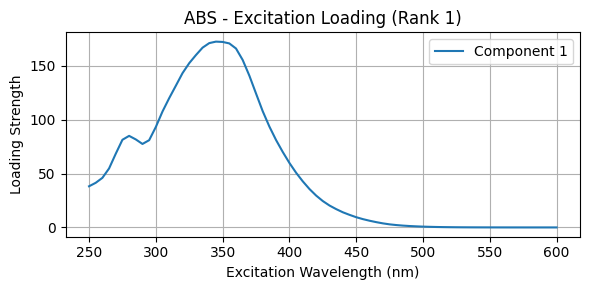

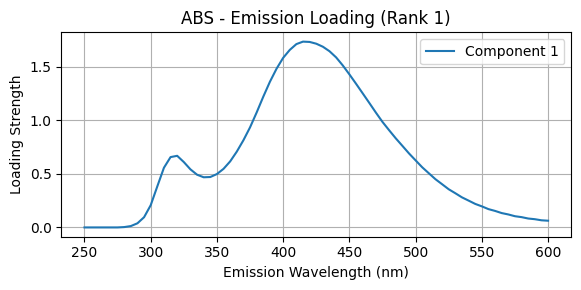

Loading_1 peak ex_band: 345.0
Loading_1 peak em_band: 415.0


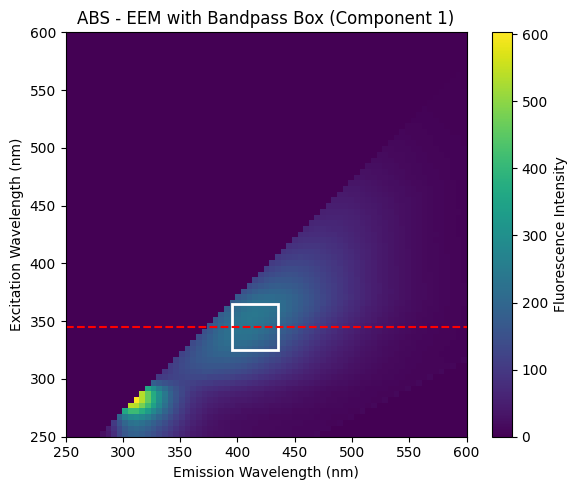

In [14]:
sample = "ABS"
rank = 1
factors = factors_dict.get(sample)

mp_idx = sample_name.index(sample)  # "PET" „Å´ÂØæÂøú„Åô„Çã„Ç§„É≥„Éá„ÉÉ„ÇØ„ÇπÔºà‰æãÔºö0Ôºâ
eem = augmented_eems[mp_idx, 0]  # PET„ÅÆÊúÄÂàù„ÅÆ„Éé„Ç§„Ç∫‰ªò„ÅçEEMÔºàshape: 81x81Ôºâ


if factors is not None:
    plot_selected_loadings(
        factors, 
        rank,
        ex_bands,
        em_bands,
        sample_label=sample
    )
else:
    print(f"{sample} „ÅÆËß£ÊûêÁµêÊûú„ÅåË¶ã„Å§„Åã„Çä„Åæ„Åõ„Çì„ÄÇ")



---